## The Boston Housing Dataset

Ve cvičení 3 jsme vytvářeli model na odhad ceny bytu na základě datasetu Boston Housing

Jednalo se lineární model, který používal následující proměnné:

* RM - průměrný počet pokojů na byt (vstupní proměnná)
* LSTAT - procentuálně nižší stav populace (vstupní proměnná)
* MDEV - mediánová hodnota obydlí obývaných vlastníky v 1000 USD (výstupní proměnná)

Pro připomenutí, přesnou modelu byla přibližně následující:

- Hodnota nakladove funkce: 6.223666483906951
- R2 score: 0.7648488831944359
- RMSE: 3.5280778007030826

# Cíl
Cílem tohoto cvičení je vytvoření modelu pomocí jednoduché dopředné neuronové sítě.

# 1. Příprava dat

## 1.1 Načtení dat

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [5]:
data = pd.read_csv ("../dataset/HousingData.csv")

## 1.2 Průzkum dat
Podrobnější průzkum najdete ve cvičení 3. Zde kroky opakujeme pro připomení.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


Před výběrem a vytvořením modelu je vhodné mít přehled o vstupních datech.
Tím lze předejít pozdějším problémům. Některé modely například vyžadují specifická data.

In [7]:
data.head(10)

CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622    3  222     18.7   
5  0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622    3  222     18.7   
6  0.08829  12.5   7.87   NaN  0.524  6.012   66.6  5.5605    5  311     15.2   
7  0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505    5  311     15.2   
8  0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821    5  311     15.2   
9  0.17004  12.5   7.87   NaN  0.524  6.004   85.9  6.5921    5  311     15.2   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  
5  394.12   5.21  28.7  
6  395.60  12.43  22.9  
7  396.90  19.15  27.1  
8  386.63  29.93  16.5  
9  386.71  17.10  18.9

In [8]:
data.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  486.000000  486.000000  486.000000  486.000000  506.000000  506.000000   
mean     3.611874   11.211934   11.083992    0.069959    0.554695    6.284634   
std      8.720192   23.388876    6.835896    0.255340    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.081900    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.253715    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.560263   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  486.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.518519    3.795043    9.549407  408.237154   18.455534  356.674032   
std     27.999513    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.175000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     76.800000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     93.975000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  486.000000  506.000000  
mean    12.715432   22.532806  
std      7.155871    9.197104  
min      1.730000    5.000000  
25%      7.125000   17.025000  
50%     11.430000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

In [9]:
corr=data.corr()
corr

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.191178  0.401863 -0.054355  0.417130 -0.219150  0.354342   
ZN      -0.191178  1.000000 -0.531871 -0.037229 -0.513704  0.320800 -0.563801   
INDUS    0.401863 -0.531871  1.000000  0.059859  0.764866 -0.390234  0.638431   
CHAS    -0.054355 -0.037229  0.059859  1.000000  0.075097  0.104885  0.078831   
NOX      0.417130 -0.513704  0.764866  0.075097  1.000000 -0.302188  0.731548   
RM      -0.219150  0.320800 -0.390234  0.104885 -0.302188  1.000000 -0.247337   
AGE      0.354342 -0.563801  0.638431  0.078831  0.731548 -0.247337  1.000000   
DIS     -0.374166  0.656739 -0.711709 -0.093971 -0.769230  0.205246 -0.744844   
RAD      0.624765 -0.310919  0.604533  0.001468  0.611441 -0.209847  0.458349   
TAX      0.580595 -0.312371  0.731055 -0.032304  0.668023 -0.292048  0.509114   
PTRATIO  0.281110 -0.414046  0.390954 -0.111304  0.188933 -0.355501  0.269226   
B       -0.381411  0.171303 -0.360532  0.051264 -0.380051  0.128069 -0.275303   
LSTAT    0.444943 -0.414193  0.590690 -0.047424  0.582641 -0.614339  0.602891   
MEDV    -0.391363  0.373136 -0.481772  0.181391 -0.427321  0.695360 -0.394656   

              DIS       RAD       TAX   PTRATIO         B     LSTAT      MEDV  
CRIM    -0.374166  0.624765  0.580595  0.281110 -0.381411  0.444943 -0.391363  
ZN       0.656739 -0.310919 -0.312371 -0.414046  0.171303 -0.414193  0.373136  
INDUS   -0.711709  0.604533  0.731055  0.390954 -0.360532  0.590690 -0.481772  
CHAS    -0.093971  0.001468 -0.032304 -0.111304  0.051264 -0.047424  0.181391  
NOX     -0.769230  0.611441  0.668023  0.188933 -0.380051  0.582641 -0.427321  
RM       0.205246 -0.209847 -0.292048 -0.355501  0.128069 -0.614339  0.695360  
AGE     -0.744844  0.458349  0.509114  0.269226 -0.275303  0.602891 -0.394656  
DIS      1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.493328  0.249929  
RAD     -0.494588  1.000000  0.910228  0.464741 -0.444413  0.479541 -0.381626  
TAX     -0.534432  0.910228  1.000000  0.460853 -0.441808  0.536110 -0.468536  
PTRATIO -0.232471  0.464741  0.460853  1.000000 -0.177383  0.375966 -0.507787  
B        0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.369889  0.333461  
LSTAT   -0.493328  0.479541  0.536110  0.375966 -0.369889  1.000000 -0.735822  
MEDV     0.249929 -0.381626 -0.468536 -0.507787  0.333461 -0.735822  1.000000

<Axes: >

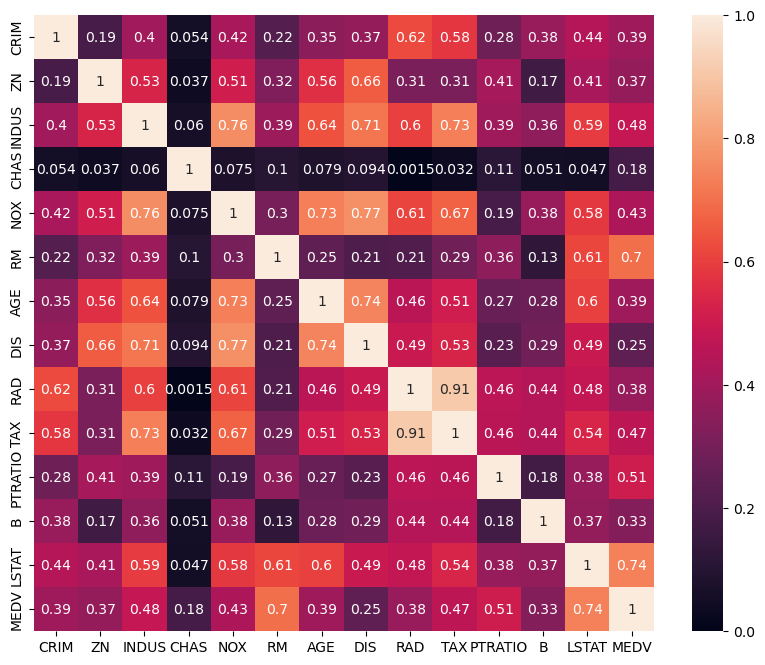

In [10]:
plt.figure(figsize = (10,8))
sns.heatmap(corr.abs(), annot=True, vmin=0, vmax=1)

## 1.3 Vyčištění dat

Zobrazení sloupců s hodnotami NULL

In [11]:
print (data.isnull().sum())

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


Odstranění řádků s hodnotami NULL

In [12]:
data=data.dropna()

## 1.4 Rozdělení na vstupní a výstupní parametry
Na rozdíl od lineárního modelu, budeme používat všechny sloupce. 

In [13]:
X = data.iloc[:, 0:13]
Y = data['MEDV']

In [14]:
X.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  394.000000  394.000000  394.000000  394.000000  394.000000  394.000000   
mean     3.690136   11.460660   11.000863    0.068528    0.553215    6.280015   
std      9.202423   23.954082    6.908364    0.252971    0.113112    0.697985   
min      0.006320    0.000000    0.460000    0.000000    0.389000    3.561000   
25%      0.081955    0.000000    5.130000    0.000000    0.453000    5.879250   
50%      0.268880    0.000000    8.560000    0.000000    0.538000    6.201500   
75%      3.435973   12.500000   18.100000    0.000000    0.624000    6.605500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  394.000000  394.000000  394.000000  394.000000  394.000000  394.000000   
mean    68.932741    3.805268    9.403553  406.431472   18.537563  358.490939   
std     27.888705    2.098571    8.633451  168.312419    2.166460   89.283295   
min      2.900000    1.129600    1.000000  187.000000   12.600000    2.600000   
25%     45.475000    2.110100    4.000000  280.250000   17.400000  376.707500   
50%     77.700000    3.199200    5.000000  330.000000   19.100000  392.190000   
75%     94.250000    5.116700   24.000000  666.000000   20.200000  396.900000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT  
count  394.000000  
mean    12.769112  
std      7.308430  
min      1.730000  
25%      7.125000  
50%     11.300000  
75%     17.117500  
max     37.970000

In [15]:
X.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
5  0.02985   0.0   2.18   0.0  0.458  6.430  58.7  6.0622    3  222     18.7   

        B  LSTAT  
0  396.90   4.98  
1  396.90   9.14  
2  392.83   4.03  
3  394.63   2.94  
5  394.12   5.21

In [16]:
Y.describe()

count    394.000000
mean      22.359645
std        9.142979
min        5.000000
25%       16.800000
50%       21.050000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

In [17]:
Y.head()

0    24.0
1    21.6
2    34.7
3    33.4
5    28.7
Name: MEDV, dtype: float64

## 1.5 Standardizace dat
Neuronové sítě obecně lépe pracují se standardizovanými daty, protože změny vah se proporčně promítnou do všech parametrů stejně.

Každá vlastnost má jiný průměr, jinou směrodatnou odchylku.

Důvody standardizace:
* zabránit tomu, aby některé rysy dominovaly modelu
* modely strojového učení rychleji konvergují

Výpočet:
* x_new = (x – mean) / standard_deviation
* mean = sum(x) / count(x)
* standard_deviation = sqrt( sum( (x – mean)^2 ) / count(x))

In [18]:
# Pro standardizaci použijeme StandardScaler z knihovny scikit-learn
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

Stejnou transformaci je třeba provést i u skutečných vstupních dat. Nastavení měřítka zjištěná během trénování musí být uložena, aby šla opakovaně použít.

In [19]:
# knihovnu joblib použijeme na uložení binární podoby instance sc do binárního souboru
import joblib
joblib.dump(sc, 'std_scaler.bin', compress=True)
sc=joblib.load('std_scaler.bin')

## 1.6 Rozdělení souboru dat na trénovací, testovací a validační podmnožinu

In [20]:
from sklearn.model_selection import train_test_split
train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

# train nyní tvoří 75 % celého souboru dat
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1 - train_ratio)

# test je nyní 10 % původního souboru dat
# validation je nyní 15 % původního souboru dat
X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 

print(X_train.shape)
print (X_val.shape)
print (X_test.shape)

(295, 13)
(59, 13)
(40, 13)


# 2. Vytvoření neuronové sítě
K vývoji neuronové sítě bude použita knihovna Keras.

In [21]:
import keras
from keras.layers import Dense, Activation, Input
from keras.models import Sequential

## 2.1 Struktura sítě

Model neuronové sítě
* Sekvenční model - data procházejí ze vstupní vrstvy přes skryté vrstvy do výstupní vrstvy (dopředná síť).
* Dense vrstva propojuje každý neuron z předchozí vrstvy s každým neuronem ve vrstvě (plně propojená vrstva).
* Bude používat jako aktivační funkce ReLU a lineární funkci. 
* Ve výstupní vrstvě je použita funkce Lineární, protože tento projekt je regresní.
* Účelem aktivační funkce je zavést nelinearitu do výstupu neuronu.

Dense layer
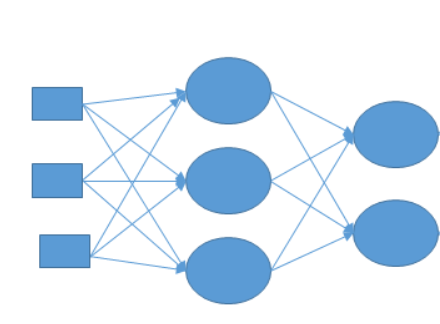

In [22]:
# vytváříme sekvenční model
model = Sequential()
model.add(Input(shape=(13,))) 

In [23]:
# první skrytá vrstva bude plně propojena se vstupnímí parametry, těch je 13
# vrstva bude obsahovat 128 neuronů
# aktivační funkce bude relu
model.add(Dense(128, activation = 'relu', input_dim = 13))

/opt/anaconda3/envs/cvika_ver9/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
# druhá skrytá vrstva bude také plně propojená
# počet neuronů bude 64. Narozdíl od tensorflow nebo pytorch, nemusíme zadávat počet vstupních parametrů. Ten se automaticky získává z předchozí vrstvy.
model.add(Dense(64, activation  = 'relu'))

In [25]:
# Třetí vrstva je opět plně propojená
model.add(Dense(32, activation  = 'relu'))

In [26]:
# Čtvrtá vrstva je opět plně propojená a má 16 neuronů
# Aktivační funkce bude lineární
model.add(Dense(16, activation  = 'linear'))

In [27]:
# Protože vytváříme model, který má predikovat jednu hodnotu, bude mít výstupní jeden výstupní neuron propojený se všemi předchozími neurony
model.add(Dense(1))

## 2.2 Nastavení parametrů učení

Ve chvíli, kdy máme navrženou strukturu sítě je potřeba zadat další parametry pro trénování.

* Optimalizátor, který používáme, je adam. Adam je optimalizační algoritmus, který lze použít místo klasického stochastického postupu gradientního sestupu k iterativní aktualizaci vah sítě na základě trénovacích dat.
* Ztrátová funkce bude střední kvadratická chyba
* Během učení se počítá i další metrika - střední absolutní chyba

In [28]:
model.compile(optimizer="adam", loss="mse", metrics=["mae"])

## 2.3 Vizualizace neuronové sítě

In [29]:
# Přehled modelu s počty parametrů
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,673 (49.50 KB)

 Trainable params: 12,673 (49.50 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
# model lze i vizualizovat, ale protože máme větší počet neuronů, síť v něm je ořezená.
from keras_visualizer import visualizer 
visualizer(model, file_format='png', view=True)

ValueError: [Keras Visualizer] Error while visualizing: <class 'Exception'>

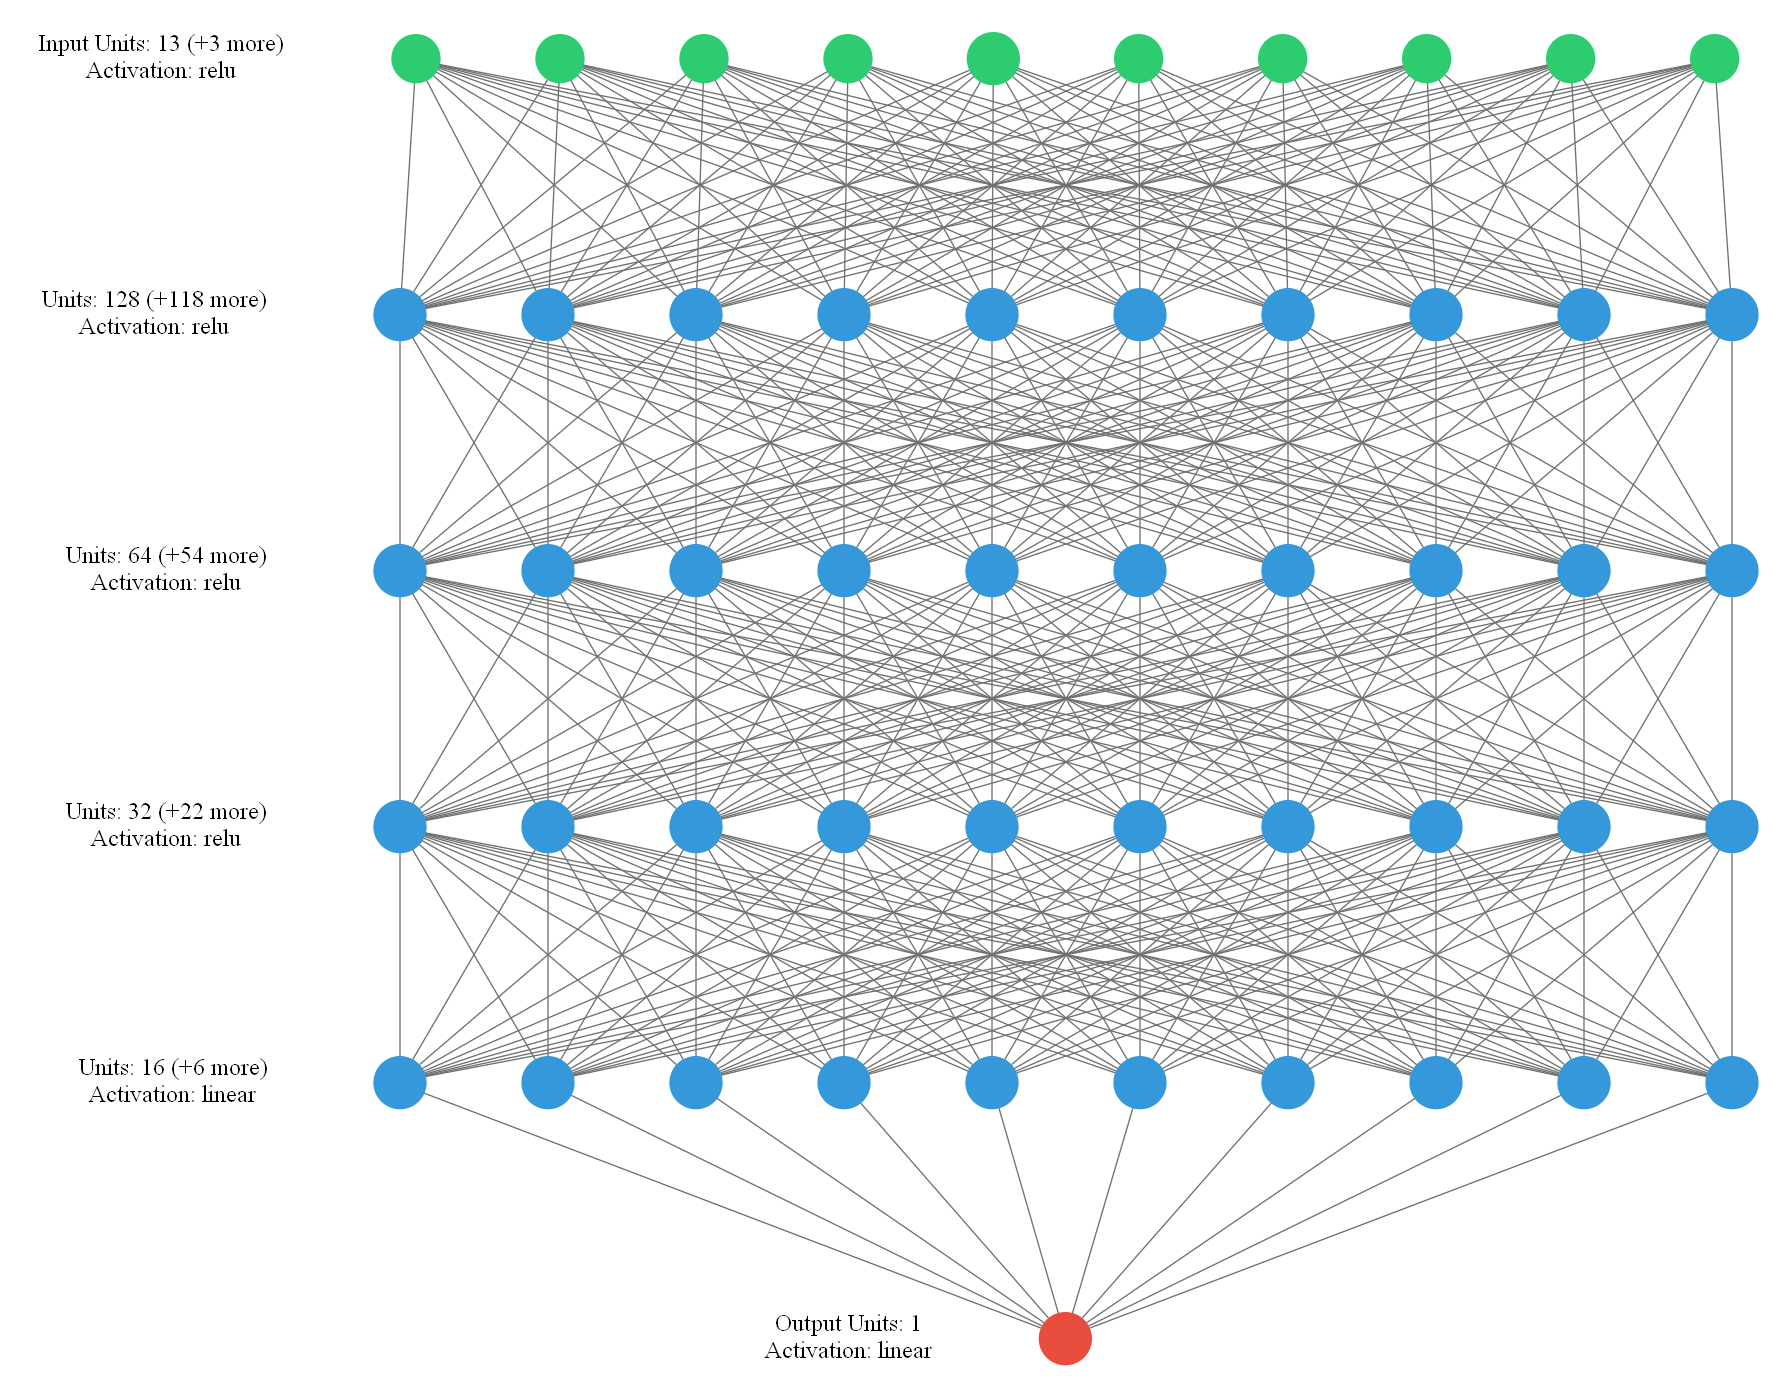

## 2.4 Učení

Proces učení je prováděn metodou fit, která je volána s následujícími parametry.

* X_train, Y_train - trénovací soubor dat
* epochy - maximální doba opakování učení dat
* batch_size - trénovací data jsou rozdělena do dávek
* validation_data - po epochách se testuje kvalita modelu na validační datové sadě, která se nepoužívá pro trénování.
* callbacks - trénování může být zastaveno, pokud ani několik tréninkových epoch nepřinese zlepšení modelu.

In [32]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=30)
history=model.fit(X_train, Y_train, epochs = 100, batch_size=5, validation_data=(X_val, Y_val), callbacks=[early_stop])

Epoch 1/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 424.5797 - mae: 18.4463 - val_loss: 73.3096 - val_mae: 6.2010
Epoch 2/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 40.4305 - mae: 4.8547 - val_loss: 33.4439 - val_mae: 3.6355
Epoch 3/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 929us/step - loss: 15.6165 - mae: 2.8967 - val_loss: 26.8327 - val_mae: 3.3613
Epoch 4/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 872us/step - loss: 9.9733 - mae: 2.3709 - val_loss: 25.0362 - val_mae: 3.0419
Epoch 5/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step - loss: 10.8064 - mae: 2.5007 - val_loss: 24.6375 - val_mae: 3.1425
Epoch 6/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - loss: 8.0836 - mae: 2.1855 - val_loss: 23.9723 - val_mae: 3.0446
Epoch 7/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step - loss: 8.4387 - mae: 2.0852 - val_loss: 22.2877 - val_mae: 2.8507
Epoch 8/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step - loss: 8.7811 - mae: 2.0553 - val_loss: 25.6313 - val_mae: 3.2925
Epoch 9/100
59/59 ━━━━━━━━━━━━━━━━━━━━

## 2.5 Hodnocení modelu
Vytrénovaný model je vyhodnocen na sadě testovacích dat. Tento datový model se během fáze učení neviděl.

Model předpovídá výsledek ze vstupních testovacích dat.

In [33]:
Y_pred = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Pro vyhodnocení funkce se používá R2 (koeficient determinace). Nejlepší možný výsledek je 1,0. Model předpovídá výsledky, které se porovnají se skutečnými výsledky.

Toto skóre lze použít k výběru nejlepšího modelu.

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(Y_test, Y_pred)
print('R2 score: {}'.format(r2))

Pro porovnání lineární regrese nám vytvořila model, který měl R2 skóre 0.75

Neuronová síť tedy dokáže lépe predikovat cenu domů. Důvodů může být více
- používá se 13 vstupních parametrů místo 2
- neuronová síť umí pracovat i s nelineárními závislostmi

## 2.6 Histori učení

Jak probíhalo učení se můžeme podívat na grafech.

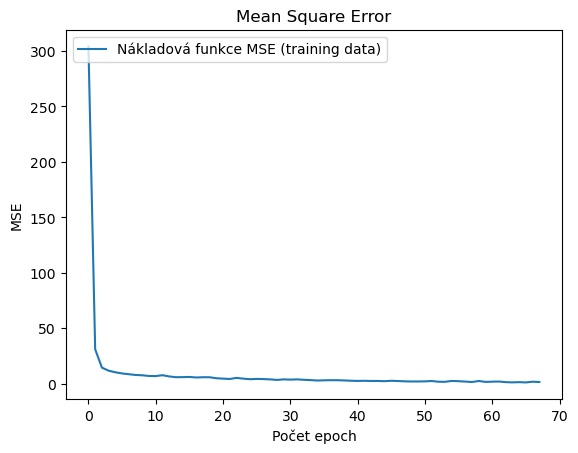

In [34]:
plt.plot(history.history['loss'], label='Nákladová funkce MSE (training data)')
plt.title('Mean Square Error')
plt.ylabel('MSE')
plt.xlabel('Počet epoch')
plt.legend(loc="upper left")
plt.show()

Ten samý graf pro Mean Absolute Error.

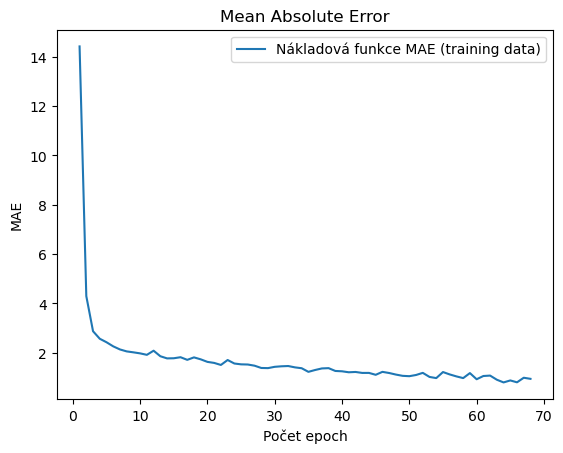

In [35]:
plt.title('Mean Absolute Error')
plt.xlabel('Počet epoch')
plt.ylabel('MAE')
plt.plot(range(1, len(history.history['mae']) + 1), history.history['mae'])
plt.legend(['Nákladová funkce MAE (training data)'])
plt.show()

## 2.7 Uložení modelu do souboru

In [ ]:
model.save('regresion_model.keras')

# 3. Inference

Při použití vytvořeného modelu, je třeba načíst scaler a model.

In [ ]:
sc=joblib.load('std_scaler.bin')

In [ ]:
model = keras.models.load_model('regresion_model.keras')

In [ ]:
# První řádek z csv (příprava dat)
# MEDV=24
data = np.array([0.00632, 18, 2.31, 0, 0.538, 6.575, 65.2, 4.09, 1, 296, 15.3, 396.9, 4.98])
data = data.reshape(1, -1)

In [ ]:
# Standardizace vstupních dat
sdata = sc.transform(data)

In [ ]:
# Predikice hodnoty
Y_pred = model.predict(sdata)

In [36]:
print (f"Odhadovaný MEDV je {Y_pred[0][0]}")

Odhadovaný MEDV je 20.94831085205078
